# CLUSTERING JERÁRQUICO Y DENDROGRAMAS
Antes de empezar, se explica la notación empleada
* X: dataset de n x m
* n: número de registros del dataset (filas)
* m: número de campos o rasgos (columnas)
* Z: array con la información de las uniones
* k: número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [2]:
np.random.seed(20)
a = np.random.multivariate_normal([10,1],[[3,1],[1,4]], size = 100)
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = 50)
X = np.concatenate((a,b))
X.shape

(150, 2)

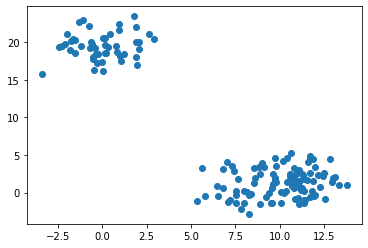

In [3]:
# sería equivalente usar plt.scatter(X.transpose()[0],X.transpose()[1])
plt.scatter(X[:,0],X[:,1])

In [4]:
Z = linkage(X, method = 'ward')

In [5]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [6]:
c, coph_dist = cophenet(Z, pdist(X))
c # varía entre 0 y 1, y cuanto más se acerque a 1 mejor será la clusterización

0.9784139646621948

In [7]:
Z[:20]

array([[1.15000000e+02, 1.19000000e+02, 6.11020272e-02, 2.00000000e+00],
       [2.00000000e+00, 4.80000000e+01, 6.21626178e-02, 2.00000000e+00],
       [4.20000000e+01, 8.80000000e+01, 7.43341675e-02, 2.00000000e+00],
       [4.10000000e+01, 5.30000000e+01, 7.62138072e-02, 2.00000000e+00],
       [5.00000000e+00, 6.00000000e+01, 8.11782764e-02, 2.00000000e+00],
       [1.18000000e+02, 1.49000000e+02, 1.05718363e-01, 2.00000000e+00],
       [1.36000000e+02, 1.43000000e+02, 1.19895357e-01, 2.00000000e+00],
       [0.00000000e+00, 6.70000000e+01, 1.25053286e-01, 2.00000000e+00],
       [1.30000000e+02, 1.39000000e+02, 1.37497755e-01, 2.00000000e+00],
       [4.00000000e+01, 9.20000000e+01, 1.39590152e-01, 2.00000000e+00],
       [8.00000000e+00, 1.30000000e+01, 1.40416844e-01, 2.00000000e+00],
       [6.90000000e+01, 8.20000000e+01, 1.51321020e-01, 2.00000000e+00],
       [2.20000000e+01, 3.90000000e+01, 1.63314843e-01, 2.00000000e+00],
       [4.00000000e+00, 8.70000000e+01, 1.65703540e

In [8]:
Z[152-len(X)]

array([4.20000000e+01, 8.80000000e+01, 7.43341675e-02, 2.00000000e+00])

In [9]:
X[[62,33,68]]

array([[ 7.83543939, -2.17454601],
       [12.83838275,  4.53744247],
       [13.32457795,  1.02992489]])

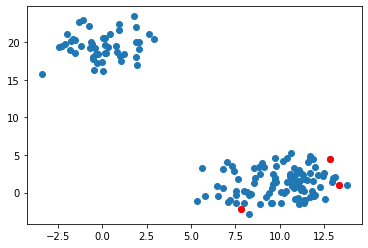

In [10]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[[62,33,68],[0]],X[[62,33,68],[1]], c = 'r')

In [11]:
Z[158-len(X)]

array([1.30000000e+02, 1.39000000e+02, 1.37497755e-01, 2.00000000e+00])

In [12]:
X[[41,15,69]]

array([[11.14729905,  0.65375764],
       [ 7.54943082,  0.27755324],
       [10.52519133,  1.5296074 ]])

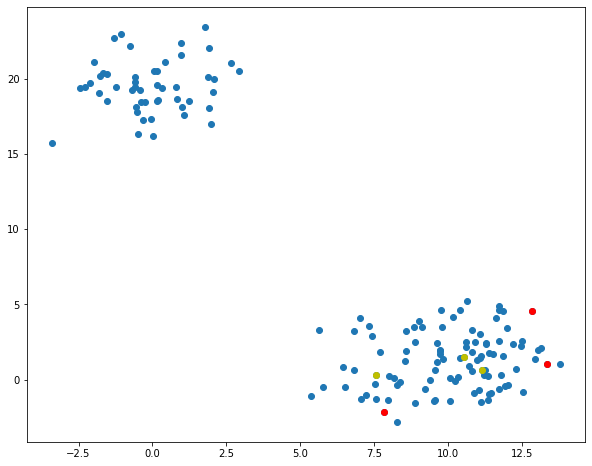

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[[62,33,68],[0]],X[[62,33,68],[1]], c = 'r')
plt.scatter(X[[41,15,69],[0]],X[[41,15,69],[1]], c = 'y')

### REPRESENTACIÓN GRÁFICA DE UN DENDROGRAMA

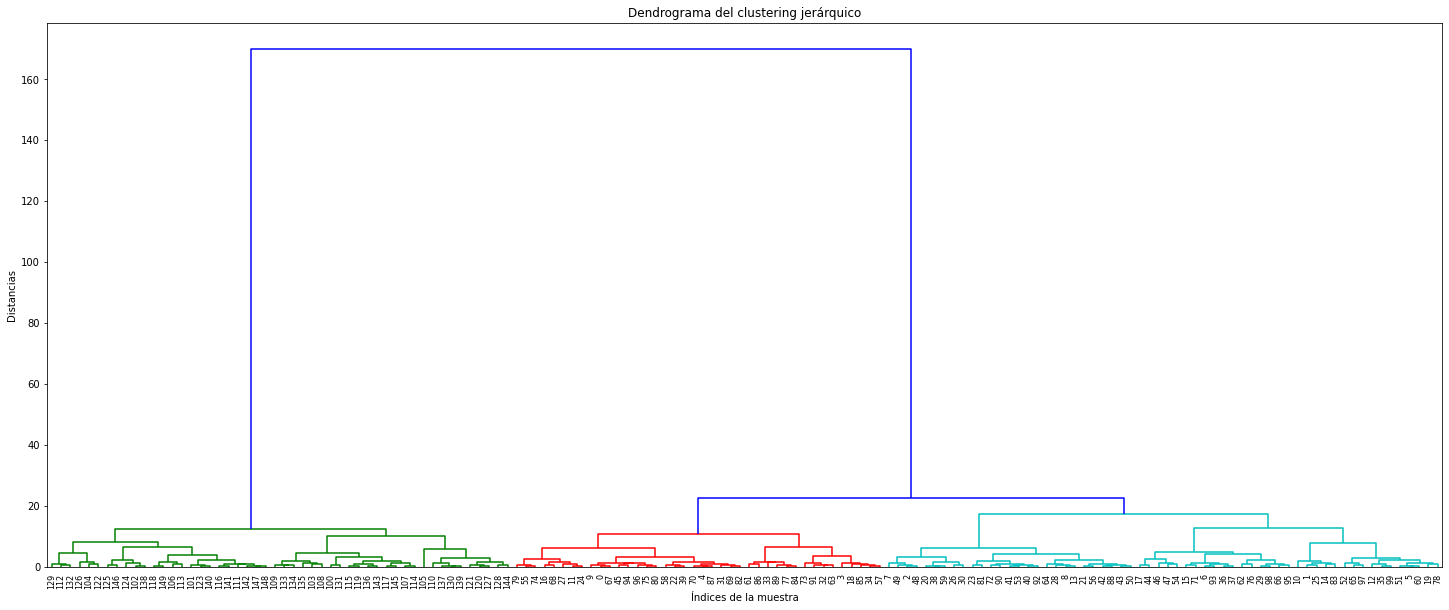

In [14]:
plt.figure(figsize = (25,10))
plt.title('Dendrograma del clustering jerárquico')
plt.xlabel('Índices de la muestra')
plt.ylabel('Distancias')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=20)
#Por defecto el color_threshold lo hace para el 70% de la mayor distancia
plt.show()

In [15]:
#Para obtener la última distancia, que vemos que es muy grande
#En la tercera columna de las Z se recogía la distancia
#Con el -1 tomamos el último valor
Z[-1,2]

170.01425215719738

###Truncar el dendrograma

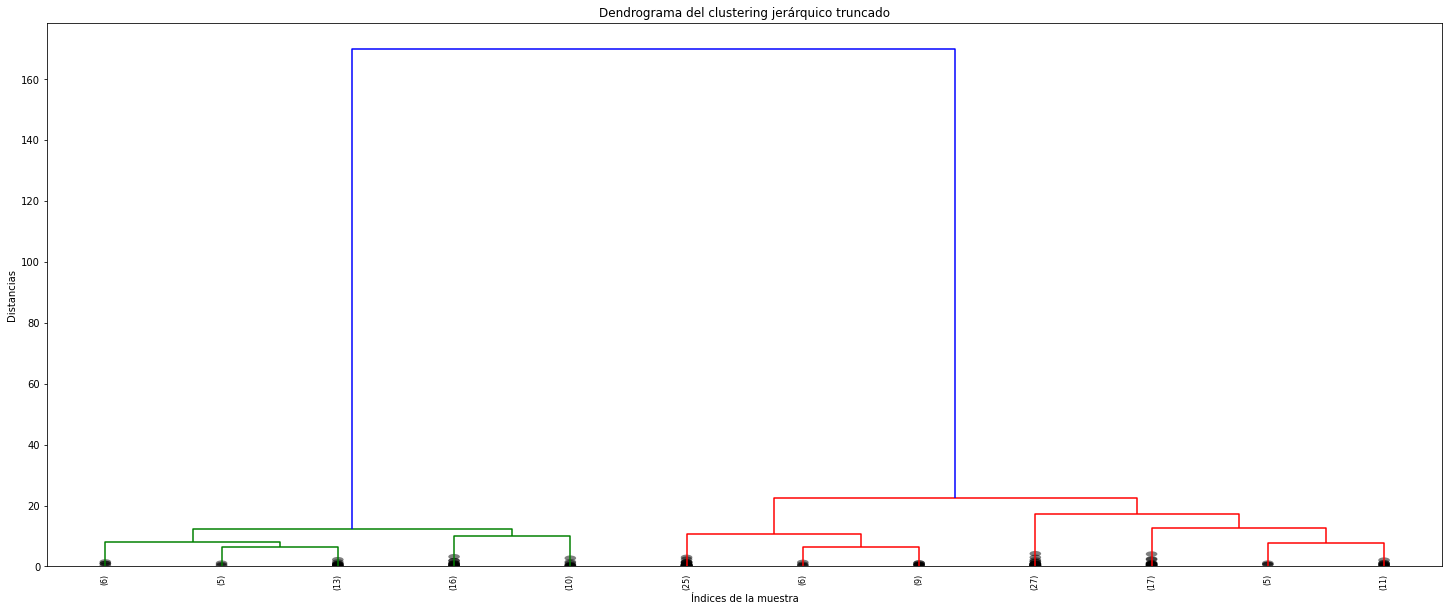

In [19]:
plt.figure(figsize = (25,10))
plt.title('Dendrograma del clustering jerárquico truncado')
plt.xlabel('Índices de la muestra')
plt.ylabel('Distancias')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, truncate_mode = 'lastp', p = 12, show_leaf_counts = True, show_contracted = True)
plt.show()

### Dendrograma personalizado

In [29]:
def dendrogram_tune(*args, **kwargs):
  max_d = kwargs.pop('max_d', None)
  if max_d and 'color_threshold' not in kwargs:
    kwargs['color_threshold'] = max_d
  annotate_above = kwargs.pop('annotate_above', 0)

  ddata = dendrogram(*args, **kwargs)

  if not kwargs.get('no_plot', False):
    plt.title('Clustering jerárquico con dendrograma truncado')
    plt.xlabel('Índice del Dataset (o tamaño del cluster)')
    plt.ylabel('Distancia')
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
      x = 0.5 * sum(i[1:3])
      y = d[1]
      if y > annotate_above:
        plt.plot(x,y,'o', c = c)
        plt.annotate('%.3g'%y, (x,y), xytext = (0,-5), textcoords = 'offset points', va = 'top', ha = 'center')
  
  if max_d: 
    plt.axhline(y = max_d, c = 'k')

  return ddata

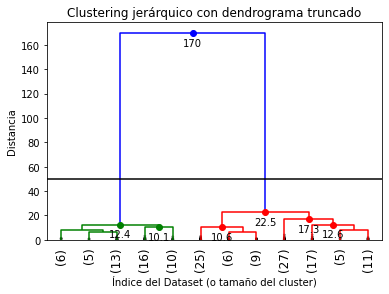

In [36]:
dendrogram_tune(Z, truncate_mode = 'lastp', p = 12, leaf_rotation = 90., leaf_font_size = 12, show_contracted = True, annotate_above = 10, max_d = 50)
plt.show()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

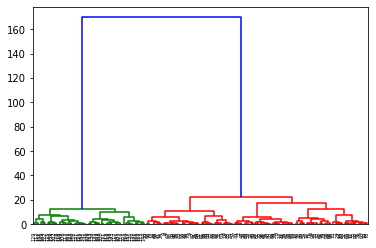

In [35]:
dendrogram(Z).keys()

### Corte automático del dendrograma

inconsistency_i = (h_i - avg(h_j))/std(h_j)

Da una idea del salto o distancia en la unión de clusters

In [37]:
from scipy.cluster.hierarchy import inconsistent

In [46]:
depth = 3 #Es la profundidad del arbol respecto a la que se calcula la avg y std. El resultado de inconsistencia es muy dependiente de este valor
incons = inconsistent(Z, depth)
incons[-10:]
#El resultado da media, desviación típica, número de elementos e inconsistencia

array([[ 2.51295997,  2.02477287,  7.        ,  1.97716614],
       [ 2.76473   ,  2.48656964,  6.        ,  1.97399412],
       [ 3.86720577,  2.62918002,  7.        ,  1.54408601],
       [ 4.67184366,  2.9983145 ,  6.        ,  1.82500874],
       [ 4.79507645,  3.14724057,  7.        ,  1.83446851],
       [ 7.3664538 ,  3.01965485,  7.        ,  1.67788282],
       [ 5.16926169,  3.78410921,  7.        ,  1.95279911],
       [ 7.95943314,  5.18205764,  7.        ,  1.80631573],
       [11.68697714,  6.29562601,  7.        ,  1.71580178],
       [35.84221309, 59.3716246 ,  7.        ,  2.25986808]])

[142.35607068   0.40815945   4.63521263  -1.73870467   1.43969432
  -1.79211167   1.963226    -0.90324952]


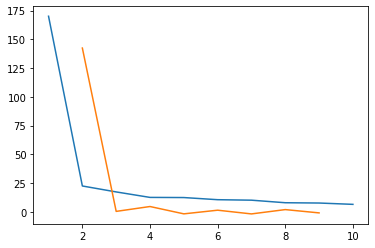

El número óptimo de clusters es 2


In [57]:
#MÉTODO DEL CODO
# Tomamos las últimas 10 distancias
last = Z[-10:, 2]
last_rev= last[::-1] #Esto los gira
idx = np.arange(1, len(last_rev)+1)
plt.plot(idx, last_rev)

#Lo que se trata con el método del codo es buscar donde existe una mayor aceleración
acc = np.diff(last, 2) #Hace diferencia en conjuntos de n
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev) 
plt.show()
k = acc_rev.argmax()+2
print('El número óptimo de clusters es %d' % k)

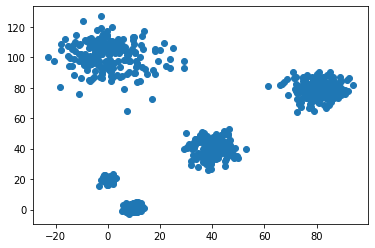

In [61]:
#Ahora vamos a probar con otra distribución que puede ser que no sea tan evidente
c = np.random.multivariate_normal([40,40], [[20,1],[1,30]], size = 200)
d = np.random.multivariate_normal([80,80], [[30,1],[1,30]], size = 200)
e = np.random.multivariate_normal([0,100], [[100,1],[1,100]], size = 200)
X2 = np.concatenate((X,c,d,e))
plt.scatter(X2[:,0],X2[:,1])

In [62]:
Z2 = linkage(X2, 'ward')

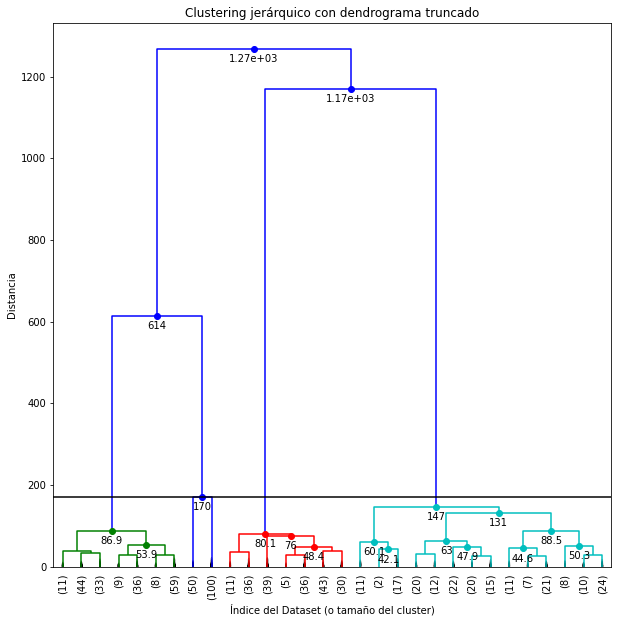

In [63]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode = 'lastp',
    p = 30,
    leaf_rotation = 90,
    leaf_font_size = 10,
    show_contracted = True,
    annotate_above = 40,
    max_d = 170
)
plt.show()

[1267.79352552 1170.82645298  613.50871244  170.01425216  147.2258813
  130.9281687    88.47758281   86.88393996   80.05702302   76.0113855 ]
[-460.35066799  113.82328026  420.70608942    6.49065827  -26.1528733
   40.85694304   -5.23327408    2.78127943]


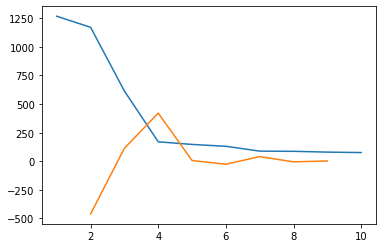

El número óptimo de clusters es 4


In [67]:
#MÉTODO DEL CODO
# Tomamos las últimas 10 distancias
last = Z2[-10:, 2]
last_rev= last[::-1] #Esto los gira
print(last_rev)

idx = np.arange(1, len(last_rev)+1)
plt.plot(idx, last_rev)

#Lo que se trata con el método del codo es buscar donde existe una mayor aceleración
acc = np.diff(last, 2) #Hace diferencia en conjuntos de n
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev) 
plt.show()
k = acc_rev.argmax()+2
print('El número óptimo de clusters es %d' % k)

In [68]:
depth = 5 #Es la profundidad del arbol respecto a la que se calcula la avg y std. El resultado de inconsistencia es muy dependiente de este valor
incons = inconsistent(Z2, depth)
incons[-10:]
#El resultado da media, desviación típica, número de elementos e inconsistencia

array([[ 14.38956278,  16.04746415,  30.        ,   3.83997261],
       [ 18.75825526,  19.66612731,  30.        ,   3.11697198],
       [ 16.04518059,  18.33572451,  30.        ,   3.86342843],
       [ 15.79480266,  18.56679359,  28.        ,   3.91466517],
       [ 25.81069702,  27.20426704,  31.        ,   3.86400676],
       [ 34.30728757,  35.50073692,  29.        ,   3.18073943],
       [ 11.64398086,  30.31146021,  30.        ,   5.22476549],
       [ 41.83390034, 110.92725871,  31.        ,   5.15360083],
       [ 77.18730962, 205.8873068 ,  31.        ,   5.31183374],
       [143.1930524 , 307.54629469,  31.        ,   3.65668679]])

In [ ]:
#IMPORTANTE Aunque el método del codo nos devuelve 4, ojo que en el scatter se ven 5 grupos diferenciados (sentido común ante todo)

###Recuperar los clusters y sus elementos

In [69]:
from scipy.cluster.hierarchy import fcluster

In [75]:
max_d = 20 #Altura para el corte
clusters = fcluster(Z, max_d, criterion='distance')
clusters, clusters.shape[0]
#Depende del criterion el parámetro que se le pasa como segundo, y para eso necesitaríamos el dendrograma o leer la matriz de linkage en la columna 2
#OJO que la matriz de linkage simboliza uniones, por lo que si queremos 3 clusters tenemos que poner un valor de max_d entre el penúltimo y el antepenúltimo

(array([2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3,
        2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3,
        3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
        3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
 150)

In [79]:
Z[:,2][-10:]

array([  6.51627234,   7.67320386,   7.92688585,  10.14379385,
        10.56859017,  12.43308081,  12.55886678,  17.31986538,
        22.48902343, 170.01425216])

In [96]:
#Si queremos por cantidad de clusters, sería de la siguiente forma
k = 3
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters, clusters.shape

(array([2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3,
        2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3,
        3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
        3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
 (150,))

In [88]:
#También se puede introducir el método de inconsistencia
#8 es la separación máxima entre elementos
fcluster(Z, 8, depth = 10, criterion = 'inconsistent')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

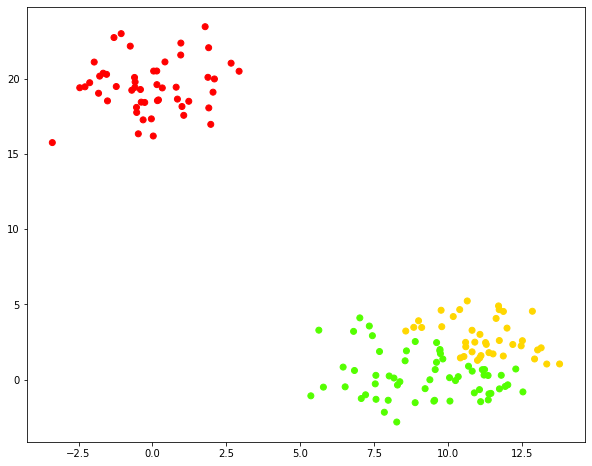

In [97]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap= 'prism')

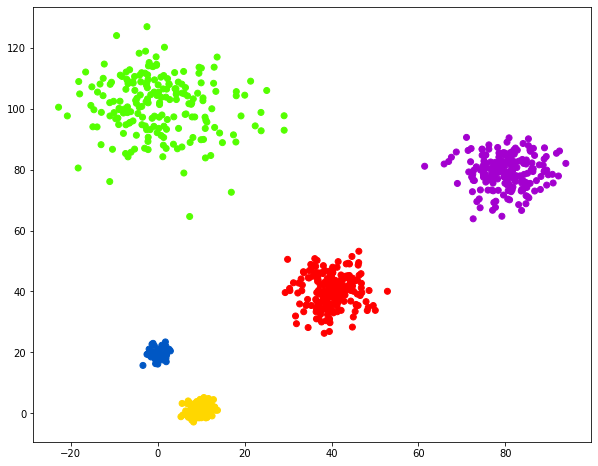

In [99]:
k = 5
clusters = fcluster(Z2, k, criterion = 'maxclust')

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap= 'prism')